## Imports

In [16]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score,f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


## Read in cleaned data

In [3]:
df_subreddits = pd.read_csv('/Users/annarutledge/Documents/general_assembly/submissions22/projects/project-3-master/data/subreddits.csv')

In [4]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


## Train - Test - Split

In [5]:
X = df_subreddits['full_text']

y = df_subreddits['subreddit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [7]:
X_train.shape

(14548,)

In [8]:
X_test.shape

(4850,)

In [9]:
y_train.shape

(14548,)

In [10]:
y_test.shape

(4850,)

## GradientBoosting Classifier model

In [11]:
cv = CountVectorizer()

In [12]:
gb = GradientBoostingClassifier()

In [13]:
pipe = make_pipeline(cv, gb)

In [14]:
params = {
    'gradientboostingclassifier__max_depth': [2,3,4],
    'gradientboostingclassifier__n_estimators': [100, 125, 150],
    'gradientboostingclassifier__learning_rate': [.08, .1, .12], 
    'countvectorizer__ngram_range':[(1,2), (1,3)], 
    'countvectorizer__max_df':[0.8, 0.9, 1],
    'countvectorizer__min_df':[0, 0.1, 0.2],
    'countvectorizer__stop_words':[None, 'english']
}

In [17]:
rs = RandomizedSearchCV(pipe, params, n_jobs=-1)

In [18]:
rs.fit(X_train, y_train)

/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, f

RandomizedSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer()),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'countvectorizer__max_df': [0.8, 0.9,
                                                                    1],
                                        'countvectorizer__min_df': [0, 0.1,
                                                                    0.2],
                                        'countvectorizer__ngram_range': [(1, 2),
                                                                         (1,
                                                                          3)],
                                        'countvectorizer__stop_words': [None,
                                                                     

In [19]:
rs.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.8, min_df=0, ngram_range=(1, 2))),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=4, n_estimators=150))])

In [20]:
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__n_estimators,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__learning_rate,param_countvectorizer__stop_words,param_countvectorizer__ngram_range,param_countvectorizer__min_df,param_countvectorizer__max_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.620170,0.029235,0.000000,0.000000,150,4,0.12,english,"(1, 2)",0.2,1,{'gradientboostingclassifier__n_estimators': 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,83.747624,2.732772,0.225133,0.023804,125,4,0.1,english,"(1, 3)",0,0.8,{'gradientboostingclassifier__n_estimators': 1...,0.731959,0.733333,0.731271,0.738742,0.717429,0.730547,0.007064,3
2,59.767066,0.838327,0.265200,0.025908,125,4,0.1,None,"(1, 2)",0,0.8,{'gradientboostingclassifier__n_estimators': 1...,0.808247,0.791065,0.795533,0.794087,0.796494,0.797085,0.005875,2
3,36.864123,1.135997,0.187852,0.020257,125,4,0.08,english,"(1, 2)",0,0.8,{'gradientboostingclassifier__n_estimators': 1...,0.726460,0.724742,0.722337,0.730835,0.714679,0.723811,0.005344,4
4,1.400859,0.080092,0.000000,0.000000,150,2,0.08,None,"(1, 3)",0.2,1,{'gradientboostingclassifier__n_estimators': 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5,73.896056,2.014797,0.232090,0.015717,150,4,0.1,None,"(1, 2)",0,0.8,{'gradientboostingclassifier__n_estimators': 1...,0.812371,0.793814,0.799313,0.800275,0.800963,0.801347,0.006061,1
6,1.471076,0.055659,0.170774,0.027822,125,3,0.08,english,"(1, 3)",0.1,0.9,{'gradientboostingclassifier__n_estimators': 1...,0.540550,0.542268,0.549141,0.549673,0.547955,0.545917,0.003762,7
7,2.286895,0.054469,0.260270,0.026548,100,2,0.08,None,"(1, 3)",0.2,0.9,{'gradientboostingclassifier__n_estimators': 1...,0.689347,0.667354,0.683505,0.672052,0.665521,0.675556,0.009313,6
8,3.026131,0.132781,0.290683,0.024528,125,4,0.08,None,"(1, 3)",0.2,0.8,{'gradientboostingclassifier__n_estimators': 1...,0.696564,0.671478,0.687629,0.682021,0.673427,0.682224,0.009249,5
9,51.873689,11.945290,0.143498,0.022641,150,4,0.12,english,"(1, 3)",0,1,{'gradientboostingclassifier__n_estimators': 1...,0.512027,0.514089,0.512371,0.512891,0.512204,0.512717,0.000745,8


In [21]:
y_preds = rs.predict(X_test)

In [22]:
y_preds

array(['crazyideas', 'crazyideas', 'crazyideas', ..., 'showerthoughts',
       'showerthoughts', 'crazyideas'], dtype=object)

### Accuracy score

In [23]:
rs.score(X_test, y_test)

0.8098969072164949

In [24]:
accuracy_score(y_test, y_preds)

0.8098969072164949

### Recall/sensitivity score

In [25]:
recall_score(y_test, y_preds, pos_label='crazyideas')

0.781957928802589

### Precision score

In [26]:
precision_score(y_test, y_preds, pos_label='crazyideas')

0.8346286701208981

### F1 Score

In [28]:
f1_score(y_test, y_preds, pos_label='crazyideas')

0.8074352548036758

### Confusion Matrix

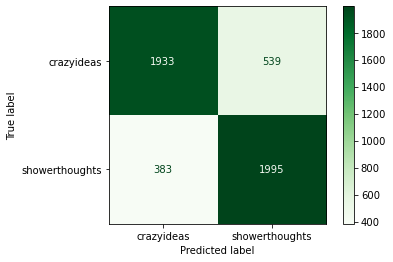

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Greens');